In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# 导入三大库


In [3]:
# 导入数据集
data = pd.read_csv('house_data.csv')
df = pd.DataFrame(data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']) # 选择特征变量和因变量
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 变量名解释
1. CRIM：城镇人均犯罪率。
2. ZN：住宅用地超过 25000平方英尺的住宅用地所占比例。
3. INDUS：城镇非零售商业用地所占比例。
4. CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。
5. NOX：一氧化氮浓度。
6. RM：住宅平均房间数。
7. AGE：1940 年之前建成的自用房屋比例。
8. DIS：到波士顿五个中心区域的加权距离。
9. RAD：辐射性公路的接近指数。
10. TAX：每 10000 美元的全值财产税率。
11. PTRATIO：城镇师生比例。
12. B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。
13. LSTAT：人口中低收入者的比例。
14. MEDV：自住房的平均房价，以千美元计。（因变量）

In [4]:
data.shape # 查看数据集的行数和列数

(506, 14)

In [5]:
data.head(5) # 查看数据集的前5行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.isnull().sum() # 查看数据集中是否有缺失值

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# 数据可视化
- 对每一个特征变量和因变量MEDV进行可视化，以便更好地理解数据。
- 通过散点图，可以看出每一个特征变量和因变量MEDV之间的关系。

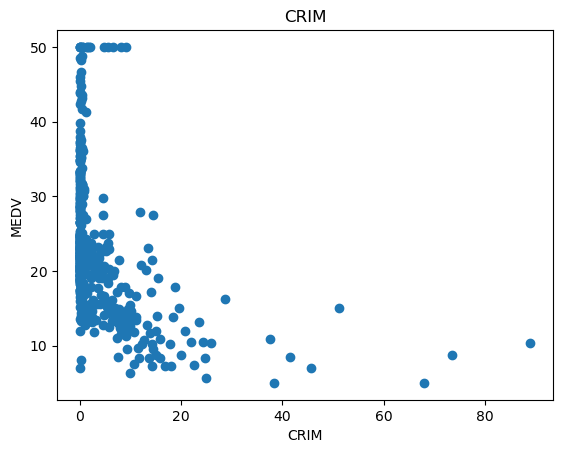

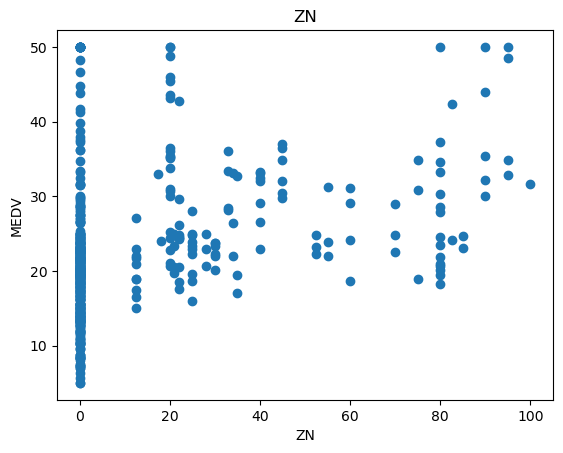

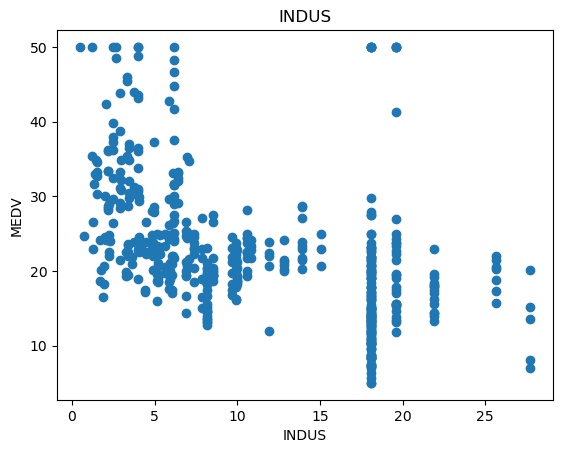

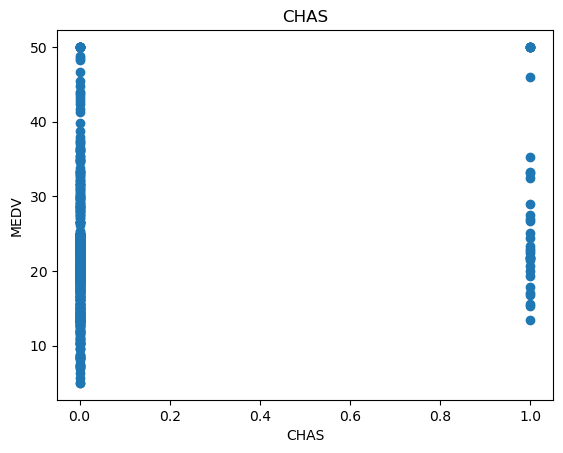

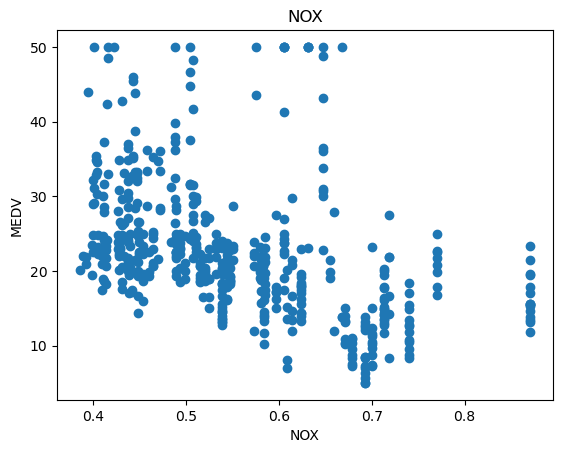

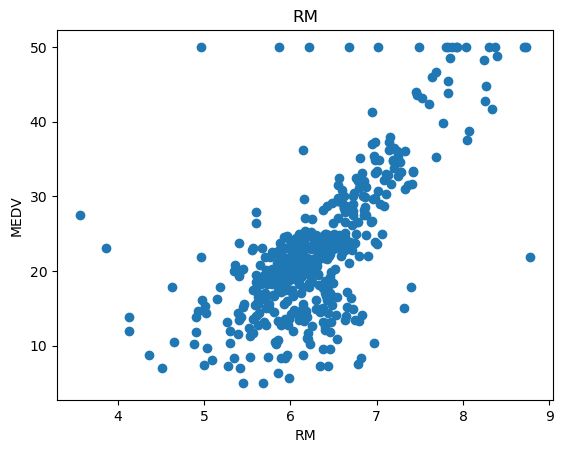

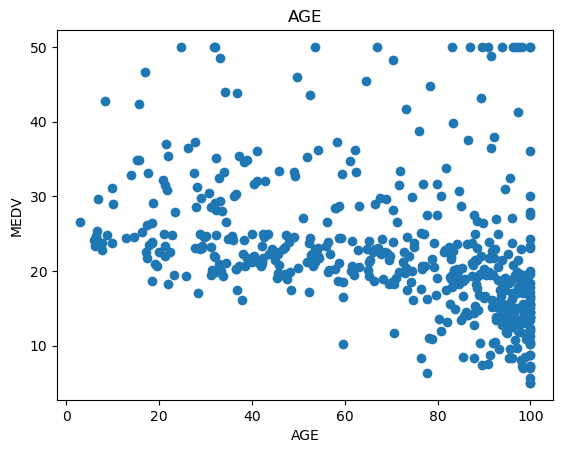

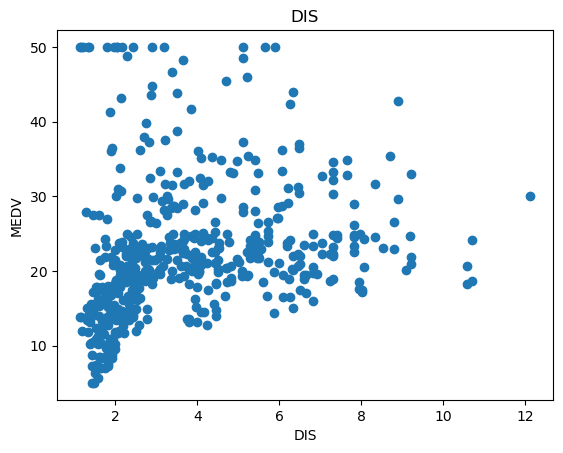

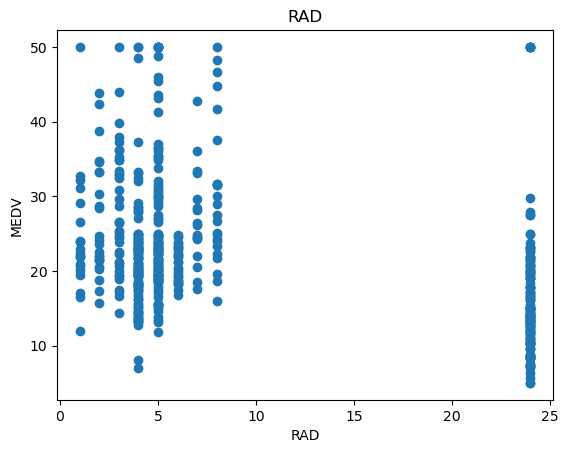

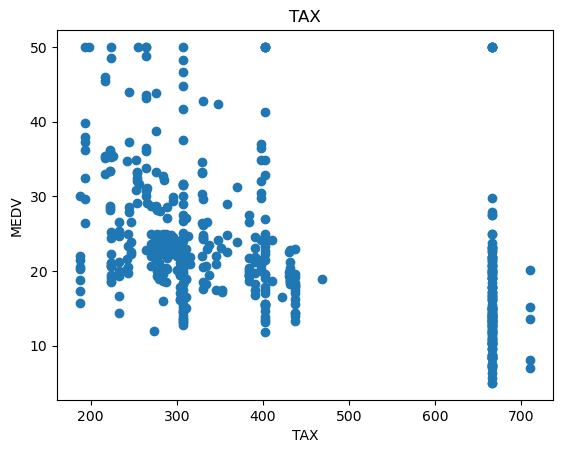

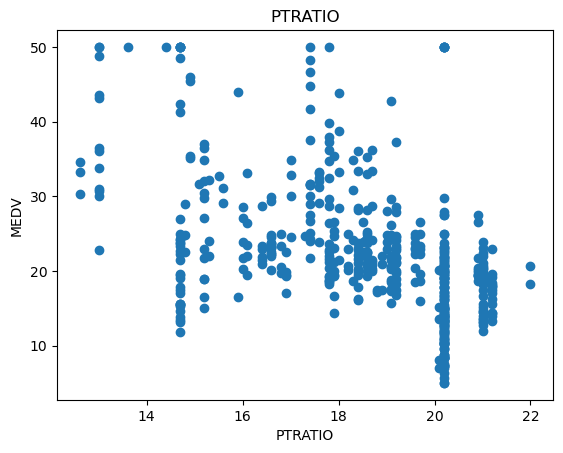

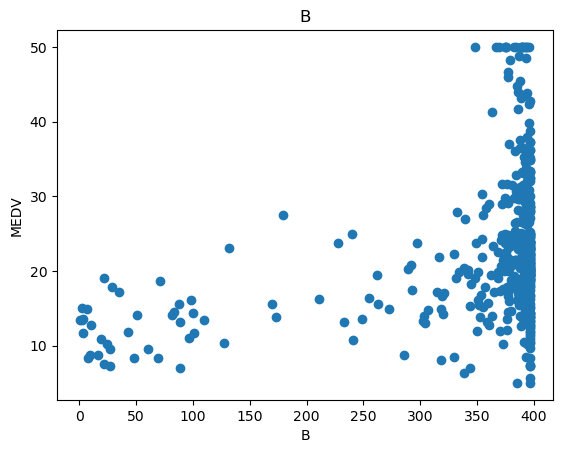

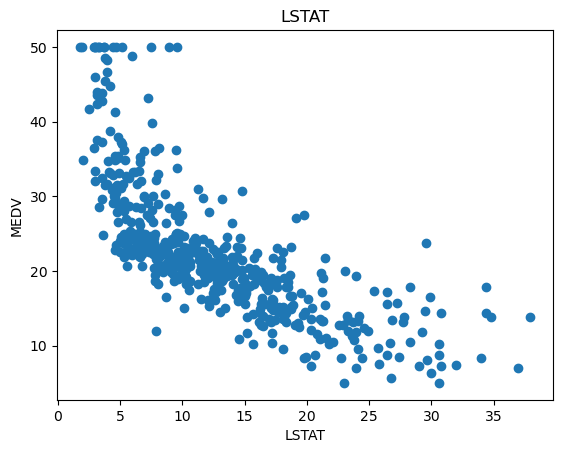

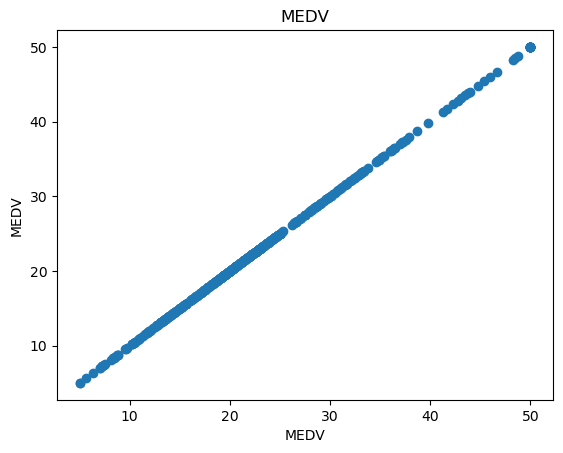

In [7]:
for each in data.columns:
    plt.scatter(data[each], data['MEDV'])
    plt.title(each)
    plt.xlabel(each)
    plt.ylabel('MEDV')
    plt.show()

# 通过散点图，可知，数据集没有异常值，数据集中的数据分布比较均匀，不需要对异常数据进行处理

In [8]:
# 打乱数据集
df_shuffled = data.sample(frac=1, random_state=42)
# 将数据集分为训练集和测试集
train_size = int(0.8 * len(df_shuffled)) # 训练集的大小为数据集的80%
train_df = df_shuffled[:train_size]
test_df = df_shuffled[train_size:]

print("训练集大小：",train_df.shape)
print("测试集大小：",test_df.shape)

训练集大小： (404, 14)
测试集大小： (102, 14)


# 下面将使用最小二乘法和梯度下降法来拟合线性回归模型，先对房间数量RM和房价MEDV进行线性回归。

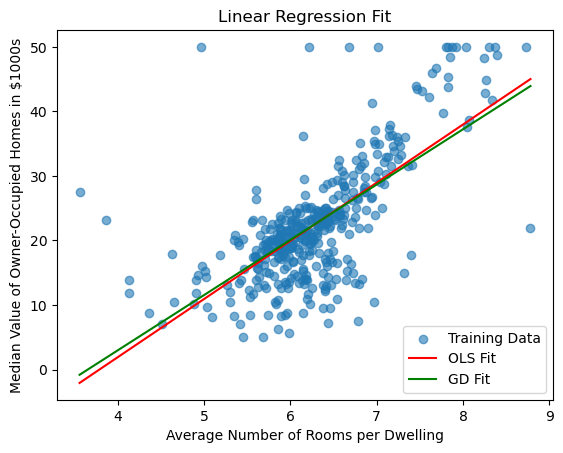

In [9]:

# 获取训练集特征和目标变量
X_train = train_df[['RM']].values  # 特征: 房间数量
y_train = train_df['MEDV'].values  # 目标变量: 房价

# 添加偏置项
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# 使用最小二乘法求解初始回归系数
theta_best = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

# 设置梯度下降的超参数
eta = 0.01  # 学习率
n_iterations = 10000  # 迭代次数

# 随机初始化回归系数
theta = np.random.randn(2)

# 执行梯度下降
for iteration in range(n_iterations):
    gradients = 2 / len(X_train_bias) * X_train_bias.T.dot(X_train_bias.dot(theta) - y_train)
    theta = theta - eta * gradients

# 绘制训练集数据点
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data')

# 绘制最小二乘法的拟合直线
X_range = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
X_range_bias = np.c_[np.ones((len(X_range), 1)), X_range]
y_pred_ols = X_range_bias.dot(theta_best)
plt.plot(X_range, y_pred_ols, color='red', label='OLS Fit')

# 绘制梯度下降法的最终拟合直线
y_pred_gd = X_range_bias.dot(theta)
plt.plot(X_range, y_pred_gd, color='green', label='GD Fit')

plt.title('Linear Regression Fit')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Owner-Occupied Homes in $1000s')
plt.legend()
plt.show()

In [10]:
# 获取测试集特征和目标变量
X_test = test_df[['RM']].values  # 特征: 房间数量
y_test = test_df['MEDV'].values  # 目标变量: 房价

# 添加偏置项
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# 使用最小二乘法预测测试集目标变量
y_pred_ols_test = X_test_bias.dot(theta_best)

# 使用梯度下降法预测测试集目标变量
y_pred_gd_test = X_test_bias.dot(theta)

# 计算最小二乘法的均方根误差（RMSE）
rmse_ols = np.sqrt(np.mean((y_pred_ols_test - y_test)**2))

# 计算梯度下降法的均方根误差（RMSE）
rmse_gd = np.sqrt(np.mean((y_pred_gd_test - y_test)**2))

print("最小二乘法在测试集上的均方根误差（RMSE）：", rmse_ols)
print("梯度下降法在测试集上的均方根误差（RMSE）：", rmse_gd)


最小二乘法在测试集上的均方根误差（RMSE）： 6.106394933268032
梯度下降法在测试集上的均方根误差（RMSE）： 6.125837983709883


# 由上述结果知，两个方法得误差并不大，其中最小二乘法得出得拟合直线更准确
# 下面将对RM、LSTAT、AGE进行多元线性回归

In [11]:


# 定义数据集
X = data[['RM', 'LSTAT', 'AGE']].values  # 特征矩阵
y = data['MEDV'].values  # 目标变量


# 自定义函数：随机分割数据集为训练集和测试集
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state is not None:  # 如果没指定随机种子
        np.random.seed(random_state)  # 设置随机种子，确保可重复性
    indices = np.arange(X.shape[0])  # 创建索引数组
    np.random.shuffle(indices)  # 打乱索引数组
    split_index = int(X.shape[0] * (1 - test_size))  # 计算分割索引
    train_indices = indices[:split_index]  # 训练集索引
    test_indices = indices[split_index:]  # 测试集索引
    X_train, X_test = X[train_indices], X[test_indices]  # 分割特征矩阵
    y_train, y_test = y[train_indices], y[test_indices]  # 分割目标变量
    return X_train, X_test, y_train, y_test



# 调用自定义函数，进行数据集分割
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)


# 自定义函数：特征缩放 - 标准化
def standard_scaler(X_train, X_test):
    mean = np.mean(X_train, axis=0)  # 计算特征的均值
    std = np.std(X_train, axis=0)  # 计算特征的标准差
    X_train_scaled = (X_train - mean) / std  # 标准化训练集特征
    X_test_scaled = (X_test - mean) / std  # 使用训练集的均值和标准差标准化测试集特征
    return X_train_scaled, X_test_scaled


# 调用自定义函数，对特征进行标准化处理
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test)


# 添加偏置项
X_train_scaled_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # 在训练集特征矩阵中添加偏置项列
X_test_scaled_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]  # 在测试集特征矩阵中添加偏置项列


# 设置梯度下降的超参数
eta = 0.01  # 学习率
n_iterations = 10000  # 迭代次数


# 随机初始化回归系数
theta = np.random.randn(X_train_scaled_bias.shape[1])  # 随机初始化回归系数


# 执行梯度下降
for iteration in range(n_iterations):
    gradients = 2 / len(X_train_scaled_bias) * X_train_scaled_bias.T.dot(X_train_scaled_bias.dot(theta) - y_train)  # 计算梯度
    theta = theta - eta * gradients  # 更新回归系数


# 在测试集上进行预测
y_pred_test = X_test_scaled_bias.dot(theta)  # 使用训练好的模型进行预测

# 计算均方根误差（RMSE）
rmse = np.sqrt(np.mean((y_pred_test - y_test) ** 2))  # 计算均方根误差

print("多元线性回归在测试集上的均方根误差（RMSE）：", rmse)


多元线性回归在测试集上的均方根误差（RMSE）： 5.408923417249842
